In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns

#Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
import tensorflow as tf

In [3]:
df = pd.read_parquet('Datasets/latest_july_22_flood_data.parquet.gzip')

In [6]:
df['censusBlockGroupFips'].nunique()

106097

In [ ]:
shapefile_path = 'cb_2018_us_state_500k.shp'  # Replace with the path to your shapefile
map_df = gpd.read_file(shapefile_path)

In [6]:
print(df['number_of_obs_in_group'].median())
print(df['number_of_obs_in_group'].mean())

8.0
54.20073134475678


In [3]:
df.shape[0]

2495293

In [3]:
df.head()

,agricultureStructureIndicator,asOfDate,policyCount,dateOfLoss,elevatedBuildingIndicator,ratedFloodZone,houseWorship,locationOfContents,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDeductibleCode,netContentsPaymentAmount,disasterAssistanceCoverageRequired,ficoNumber,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityName,numberOfUnits,buildingReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id,originalConstructionDate_pddatetime,originalConstructionDate_year,AgeofBuildinguntilflood,relativeDamage,proportionLeqOne,proportionLeqTwo,proportionLeqThree,proportionLeqFour,proportionLeqFive,proportionLeqSix,medWaterDepth,p25WaterDepth,p50WaterDepth,p75WaterDepth,p90WaterDepth,p95WaterDepth,meanWaterDepth,stdWaterDepth,skewnessWaterDepth,kurtosisWaterDepth,number_of_obs_in_group,diffMedWaterDepth,diffMeanWaterDepth,diff90WaterDepth
0,0,2020-01-22T16:55:53.194Z,1,1998-02-07 00:00:00+00:00,0,X,0,NaN,4.0,0,1.0,1963-01-01T00:00:00.000Z,1997-01-11T00:00:00.000Z,NaN,NaN,NaN,0,7,0,200000.0,50000.0,1998,0,382.0,0,0.00,937.0,1,N,0,0.0,0.0,612.0,0.0,0,Pineapple Express - Southern,15000.0,0.0,60294.0,"OCEANSIDE, CITY OF",1.0,937.0,A,0,0.0,0,CA,Currently Unavailable,92056.0,6073.0,6.073019e+09,6.073019e+10,33.2,-117.3,23dcb0d8-3e61-45bf-899f-b951946ce2ff,1963-01-01 00:00:00+00:00,1963.0,35.0,0.407684,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,1.0,0.0,0.000000,0.0
1,0,2020-01-22T16:55:53.194Z,1,2005-08-29 00:00:00+00:00,0,X,0,NaN,2.0,0,1.0,1967-07-01T00:00:00.000Z,1990-07-12T00:00:00.000Z,NaN,NaN,NaN,0,7,0,100000.0,40000.0,2005,1,NaN,0,0.00,NaN,1,N,0,0.0,0.0,654.0,0.0,0,Hurricane Katrina,30000.0,0.0,225203.0,NEW ORLEANS/ORLEANS PARISH*,1.0,NaN,A,0,0.0,0,LA,Currently Unavailable,70131.0,22071.0,2.207100e+10,2.207100e+11,29.9,-90.0,55783cdd-ccbd-4b19-930b-072def248507,1967-07-01 00:00:00+00:00,1967.0,38.0,NaN,0.933702,0.944751,0.944751,0.944751,0.955801,0.955801,0.0,0.0,0.0,1.0,1.0,1.0,0.491429,1.342791,7.012995,NaN,175.0,0.0,-0.491429,-1.0
2,0,2020-01-22T16:55:53.194Z,1,1998-09-28 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1972-01-01T00:00:00.000Z,1997-07-24T00:00:00.000Z,8813.21,1720.0,0.0,0,1,0,100000.0,50000.0,1998,1,9313.0,0,8813.21,80000.0,1,N,0,1720.0,0.0,133.0,0.0,0,Hurricane Georges (Panhandle),15000.0,0.0,120274.0,SANTA ROSA COUNTY *,1.0,100000.0,A,0,0.0,0,FL,Currently Unavailable,32566.0,12113.0,1.211301e+10,1.211301e+11,30.4,-86.9,bfb5922b-1b21-4882-b1d4-b3825ff53e37,1972-01-01 00:00:00+00:00,1972.0,26.0,0.116413,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,3.0,0.0,0.000000,0.0
3,0,2019-09-19T13:45:58.425Z,1,1994-10-07 00:00:00+00:00,0,X,0,NaN,2.0,0,1.0,1960-01-01T00:00:00.000Z,1993-10-01T00:00:00.000Z,2906.00,0.0,0.0,0,7,0,100000.0,25000.0,1994,0,4428.0,0,2906.00,100000.0,1,N,0,0.0,0.0,NaN,0.0,0,None,NaN,0.0,450026.0,"BEAUFORT, CITY OF",1.0,0.0,A,0,0.0,0,SC,Currently Unavailable,29902.0,45013.0,4.501300e+10,4.501300e+11,32.4,-80.7,c1cf6e00-1e6d-4493-93fc-eb430ef15495,1960-01-01 00:00:00+00:00,1960.0,34.0,0.044280,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,1.0,0.0,0.000000,0.0
4,0,2019-09-19T13:45:58.425Z,1,1996-03-11 00:00:00+00:00,0,X,0,NaN,1.0,0,1.0,1988-01-01T00:00:00.000Z,1996-01-11T00:00:00.000Z,38

In [59]:
df = df[df['floodEvent']!='Hurricane Katrina']

In [60]:
df[(df['buildingPropertyValue'] >= 10000) & (df['buildingPropertyValue'] < 10000000)]

df = df[df['medWaterDepth'] < 20]

df['relativeDamage'] = df['buildingDamageAmount']/df['buildingPropertyValue']

df['relativeDamage'].replace([np.inf, -np.inf], np.nan, inplace=True)

df = df[df['relativeDamage'] <= 1]

df['dateOfLoss'] = pd.to_datetime(df['dateOfLoss'])
df['originalConstructionDate'] = pd.to_datetime(df['originalConstructionDate'], errors='coerce')
df['originalConstructionDate_year'] = df['originalConstructionDate'].dt.year

df['AgeofBuildinguntilflood'] = df['yearOfLoss'] - df['originalConstructionDate_year']

df = df[df['AgeofBuildinguntilflood']>=0]

df['bool95'] = df['proportionLeqOne'] >= .95
df['bool90'] = df['proportionLeqOne'] >= .9
df['bool80'] = df['proportionLeqOne'] >= .8
df['bool75'] = df['proportionLeqOne'] >= .75
df['bool50'] = df['proportionLeqOne'] >= .5

In [61]:
df['bool0'] = (df['proportionLeqOne'] <= .2) 
df['bool1'] = (df['proportionLeqOne'] > .2) & (df['proportionLeqOne'] <= .4)
df['bool2'] = (df['proportionLeqOne'] > .4) & (df['proportionLeqOne'] <= .6)
df['bool3'] = (df['proportionLeqOne'] > .6) & (df['proportionLeqOne'] <= .8)
df['bool4'] = (df['proportionLeqOne'] > .8)

In [62]:
# Assuming 'df' is your DataFrame and 'elevationDifference' is the column name

# # Step 1: Impute missing values with mean imputation
# mean_imputation = df['elevationDifference'].mean()
# df['elevationDifference'] = df['elevationDifference'].fillna(mean_imputation)

# # Step 2: Remove outliers
# z_scores = np.abs((df['elevationDifference'] - df['elevationDifference'].mean()) / df['elevationDifference'].std())
# threshold = 3  # Adjust the threshold as needed
# df = df[z_scores <= threshold]

# # Step 3: Create categorical bins
# num_bins = 10
# df['elevationDifference_category'] = pd.cut(df['elevationDifference'], bins=num_bins, labels=False)

# # Optional: Rename the categories to meaningful labels
# category_labels = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
#                    'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10']
# df['elevationDifference_category'] = df['elevationDifference_category'].map(lambda x: category_labels[x])

In [63]:
# desired_variables = ['waterDepth', 'floodEvent', 'ratedFloodZone', 
#                      'causeOfDamage', 'yearOfLoss', 'state',  'relativeDamage',
#                      'AgeofBuildinguntilflood',
#                      'postFIRMConstructionIndicator', 'occupancyType' , 
#                      'floodproofedIndicator', 'rateMethod', 'proportionLeqOne', 
#                      'bool75', 'bool50', 'bool80', 'bool90', 'medWaterDepth']


desired_variables = ['elevatedBuildingIndicator', 'numberOfFloorsInTheInsuredBuilding', 'occupancyType', 
                     'postFIRMConstructionIndicator', 
                     'yearOfLoss', 'causeOfDamage', 'floodproofedIndicator', 
                     'proportionLeqOne', 'relativeDamage',
                     'AgeofBuildinguntilflood', 'bool0', 'bool1', 'bool2', 'bool3', 'bool4', 
                     'proportionLeqTwo', 'proportionLeqThree','p90WaterDepth', 'AgeofBuildinguntilflood', 'waterDepth']

df_new = df[desired_variables]

In [64]:
# Specify the variables to one-hot encode
variables_to_encode = ['numberOfFloorsInTheInsuredBuilding',  'occupancyType', 
                       'causeOfDamage', 'yearOfLoss']

# variables_to_encode = ['floodEvent', 'ratedFloodZone', 
#                        'causeOfDamage', 'state', 'yearOfLoss', 
#                        'occupancyType', 'floodproofedIndicator', 'rateMethod']

#variables excluding: smallBusinessIndicatorBuilding', 'buildingDamageAmount', ,'stateOwnedIndicator', 'rateMethod', 'rentalPropertyIndicator' , floodWaterDuration 
#, 'p75WaterDepth',  'p90WaterDepth','diff90WaterDepth' 'proportionLeqTwo',
      # 'proportionLeqThree', 'proportionLeqFour', 'proportionLeqFive',
      # 'proportionLeqSix','p25WaterDepth', 'originalConstructionDateYear',  'diffMedWaterDepth', 'medWaterDepth'

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_new, columns=variables_to_encode)

# Include the non-one-hot encoded variables from the original dataframe
# variables_to_include = ['waterDepth', 'AgeofBuildinguntilflood',   'postFIRMConstructionIndicator', 'relativeDamage', 'proportionLeqOne',  'bool75', 'bool50', 'bool80', 'bool90', 'medWaterDepth']
# variables_to_include = ['waterDepth', 'AgeofBuildinguntilflood',   'postFIRMConstructionIndicator', 'relativeDamage', 'bool75', 'bool50', 'bool80', 'bool90', 'medWaterDepth']

variables_to_include = ['elevatedBuildingIndicator', 'postFIRMConstructionIndicator',
                       'floodproofedIndicator','proportionLeqOne', 'relativeDamage',
                     'AgeofBuildinguntilflood', 'bool0', 'bool1', 'bool2', 'bool3', 'bool4', 
                     'proportionLeqTwo', 'proportionLeqThree','p90WaterDepth', 'AgeofBuildinguntilflood']

# df_encoded[variables_to_include] = df_encoded[variables_to_include]

In [65]:
df_copy = df_encoded.copy()

In [66]:
df_copy_6ft = df_copy[df_copy['waterDepth']==6].copy()
df_copy_6ft.drop(['waterDepth'], axis=1, inplace=True)

In [67]:
from sklearn.preprocessing import StandardScaler

# Specify the variables to normalize
variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne']
# variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage',  'medWaterDepth']

# Create a scaler object
scaler = StandardScaler()

# Normalize the variables
df_encoded[variables_to_normalize] = scaler.fit_transform(df_encoded[variables_to_normalize])

In [68]:
df_train_inches = df_encoded[(df_encoded['waterDepth'] == 1) | (df_encoded['waterDepth'] == 0)].copy()
df_train_feet = df_encoded[(df_encoded['waterDepth'] == 5) | (df_encoded['waterDepth'] == 7)].copy()
df_6ft = df_encoded[df_encoded['waterDepth'] == 6].copy()

In [69]:
df_train_inches.drop(['waterDepth'], axis=1, inplace=True)
df_train_feet.drop(['waterDepth'], axis=1, inplace=True)
df_6ft.drop(['waterDepth'], axis=1, inplace=True)

In [70]:
df_copy_6ft.shape[0]

26651

In [71]:
df_6ft.shape[0]

26651

In [72]:
df_train_inches = df_train_inches.sample(n=1600, random_state=42)

df_train_feet = df_train_feet.sample(n=8000, random_state=42)

df_train_inches = df_train_inches.reset_index().drop(columns='index')
df_train_feet = df_train_feet.reset_index().drop(columns='index')

y_inches = np.ones(df_train_inches.shape[0], dtype=int)
y_feet = np.zeros(df_train_feet.shape[0], dtype=int)

# Concatenate df_train_inches and df_train_feet into df_train
df_train = pd.concat([df_train_inches, df_train_feet])

# Concatenate y_inches and y_feet into y
y = np.concatenate([y_inches, y_feet])

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.20, random_state=42)

### XGBOD

In [74]:
from pyod.models.xgbod import XGBOD
from pyod.models.iforest import IForest
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN

iforest = IForest()
hbos = HBOS()
knn = KNN()

# xgbod = XGBOD(random_state=42, estimator_list=[iforest, hbos, knn], max_depth = 4, base_score = 0.2)

xgbod = XGBOD(random_state=42, estimator_list=[iforest, hbos, knn], max_depth = 4, gamma = 0.2, reg_alpha = 0.1,
              reg_lambda = 0.9, base_score = 0.2)
xgbod.fit(X_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


[23:49:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBOD(base_score=0.2, booster='gbtree', colsample_bylevel=1,
   colsample_bytree=1,
   estimator_list=[IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0), HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5), KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)],
   gamma=0.2, learning_rate=0.1, max_delta_step=0, max_depth=4,
   min_child_weight=1, n_estimators=100, n_jobs=1, nthread=None,
   objective='binary:logistic', random_state=42, reg_alpha=0.1,
   reg_lambda=0.9, scale_pos_weight=1, silent=True,
   standardization_flag_list=[True, True, True], subsample=1)

In [75]:
y_train_pred = xgbod.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = xgbod.decision_scores_  # raw outlier scores
y_train_scores = xgbod.decision_function(X_train)
# get the prediction on the test data
y_test_pred = xgbod.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = xgbod.decision_function(X_test)  # outlier scores

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The test data:", count_stat(y_test_pred))

The training data: {0: 6800, 1: 880}
The test data: {0: 1717, 1: 203}


In [76]:
Actual_pred = pd.DataFrame({'Actual': y_test, 'Pred': y_test_pred})
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0,1565,26
1,152,177


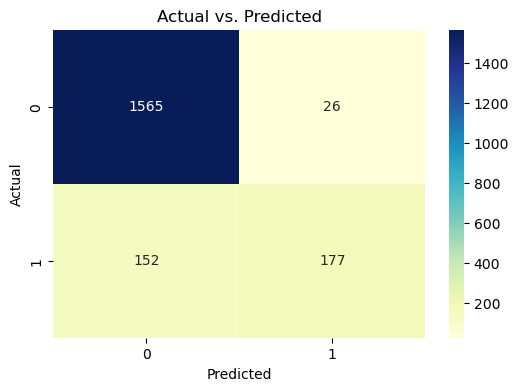

In [77]:
Actual_pred = pd.DataFrame({'Actual': y_test, 'Pred': y_test_pred})
cross_tab = pd.crosstab(Actual_pred['Actual'], Actual_pred['Pred'])

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Actual vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
df_train_new = pd.DataFrame(X_train)
df_columns = df_train_new.columns
df_train_new['pred'] = y_train_pred
df_train_new['Group'] = np.where(df_train_new['pred']==1, 'Outlier','Normal')

# Now let's show the summary statistics:
cnt = df_train_new.groupby('Group')['pred'].count().reset_index().rename(columns={'pred':'Count'})
cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
stat = df_train_new.groupby('Group').mean().reset_index() # The avg.
cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together

,Group,Count,Count %,elevatedBuildingIndicator,postFIRMConstructionIndicator,floodproofedIndicator,proportionLeqOne,relativeDamage,AgeofBuildinguntilflood,bool0,bool1,bool2,bool3,bool4,proportionLeqTwo,proportionLeqThree,p90WaterDepth,AgeofBuildinguntilflood,numberOfFloorsInTheInsuredBuilding_1.0,numberOfFloorsInTheInsuredBuilding_2.0,numberOfFloorsInTheInsuredBuilding_3.0,numberOfFloorsInTheInsuredBuilding_4.0,numberOfFloorsInTheInsuredBuilding_5.0,numberOfFloorsInTheInsuredBuilding_6.0,occupancyType_1.0,occupancyType_2.0,occupancyType_3.0,occupancyType_4.0,occupancyType_6.0,occupancyType_11.0,occupancyType_12.0,occupancyType_13.0,occupancyType_14.0,occupancyType_15.0,occupancyType_16.0,occupancyType_17.0,occupancyType_18.0,causeOfDamage_0,causeOfDamage_1,causeOfDamage_2,causeOfDamage_3,causeOfDamage_4,causeOfDamage_5,causeOfDamage_6,causeOfDamage_7,causeOfDamage_8,causeOfDamage_9,causeOfDamage_@,causeOfDamage_A,causeOfDamage_B,causeOfDamage_C,causeOfDamage_D,yearOfLoss_1978,yearOfLoss_1979,yearOfLoss_1980,yearOfLoss_1981,yearOfLoss_1982,yearOfLoss_1983,yearOfLoss_1984,yearOfLoss_1985,yearOfLoss_1986,yearOfLoss_1987,yearOfLoss_1988,yearOfLoss_1989,yearOfLoss_1990,yearOfLoss_1991,yearOfLoss_1992,yearOfLoss_1993,yearOfLoss_1994,yearOfLoss_1995,yearOfLoss_1996,yearOfLoss_1997,yearOfLoss_1998,yearOfLoss_1999,yearOfLoss_2000,yearOfLoss_2001,yearOfLoss_2002,yearOfLoss_2003,yearOfLoss_2004,yearOfLoss_2005,yearOfLoss_2006,yearOfLoss_2007,yearOfLoss_2008,yearOfLoss_2009,yearOfLoss_2010,yearOfLoss_2011,yearOfLoss_2012,yearOfLoss_2013,yearOfLoss_2014,yearOfLoss_2015,yearOfLoss_2016,yearOfLoss_2017,yearOfLoss_2018,yearOfLoss_2019,yearOfLoss_2020,yearOfLoss_2021,yearOfLoss_2022,yearOfLoss_2023,pred
0,Normal,6800,88.541667,0.240588,0.257353,0.000294,-0.957156,0.377131,0.141054,0.341618,0.263235,0.267647,0.110294,0.017206,0.386452,0.440167,17.511309,0.141054,0.440735,0.365000,0.167794,0.011765,0.014118,0.000588,0.806471,0.057206,0.028235,0.060294,0.025588,0.015294,0.001176,0.000294,0.001029,0.001765,0.000294,0.0,0.002353,0.056618,0.235294,0.326618,0.003382,0.377206,0.0,0.0,0.000147,0.0,0.000147,0.0,0.000441,0.000147,0.0,0.000000,0.001912,0.005441,0.001029,0.001029,0.004706,0.010441,0.008676,0.007941,0.006029,0.004118,0.000735,0.029559,0.009853,0.011912,0.009265,0.017941,0.011471,0.013824,0.023088,0.017794,0.017794,0.020735,0.002500,0.014412,0.007353,0.014265,0.032500,0.029118,0.018382,0.016176,0.086471,0.021324,0.027059,0.072206,0.112794,0.017647,0.012206,0.033088,0.068676,0.082059,0.025588,0.014559,0.007500,0.015294,0.033529,0.000000,0.0
1,Outlier,880,11.458333,0.172727,0.272727,0.000000,0.910673,-0.212184,-0.175603,0.000000,0.007955,0.057955,0.155682,0.778409,0.931097,0.940632,2.046250,-0.175603,0.582955,0.290909,0.106818,0.005682,0.013636,0.000000,0.817045,0.061364,0.032955,0.059091,0.015909,0.010227,0.001136,0.000000,0.000000,0.002273,0.000000,0.0,0.000000,0.072727,0.125000,0.140909,0.011364,0.648864,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.001136,0.001136,0.004545,0.010227,0.003409,0.006818,0.020455,0.006818,0.007955,0.006818,0.002273,0.013636,0.028409,0.010227,0.022727,0.028409,0.025000,0.014773,0.090909,0.036364,0.022727,0.063636,0.034091,0.028409,0.032955,0.038636,0.022727,0.032955,0.022727,0.009091,0.005682,0.020455,0.015909,0.017045,0.027273,0.028409,0.004545,0.004545,0.020455,0.020455,0.082955,0.028409,0.007955,0.019318,0.027273,0.019318,0.001136,1.0


In [79]:
# get the prediction on the 6ft data
y_6ft_pred = xgbod.predict(df_6ft)  # outlier labels (0 or 1)
y_6ft_scores = xgbod.decision_function(df_6ft)  # outlier scores

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The test data:", count_stat(y_6ft_pred))
print(y_6ft_scores)

The test data: {0: 26108, 1: 543}
[0.10171163 0.00067983 0.05379421 ... 0.04973476 0.01103496 0.03122866]


In [80]:
sum(y_6ft_pred == 1)/len(y_6ft_pred)*100

2.037447000112566

In [81]:
mask = y_6ft_pred == 1

mask_inliers = y_6ft_pred == 0

# Apply the mask to filter the DataFrame

filtered_df = df_copy_6ft[mask]

filtered_df_inliers = df_copy_6ft[mask_inliers]

In [82]:
filtered_df['relativeDamage'].mean()

0.16952423260984253

In [83]:
filtered_df['proportionLeqOne'].median()

0.8271604938271605

In [84]:
filtered_df_inliers['relativeDamage'].mean()

0.26749499766435464

In [85]:
df_copy_6ft['relativeDamage'].mean()

0.2654988952507642

In [86]:
df_copy_6ft['proportionLeqOne'].mean()

0.3135398259780247

C:\Users\Asus\AppData\Local\Temp\ipykernel_1384\1199204141.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)


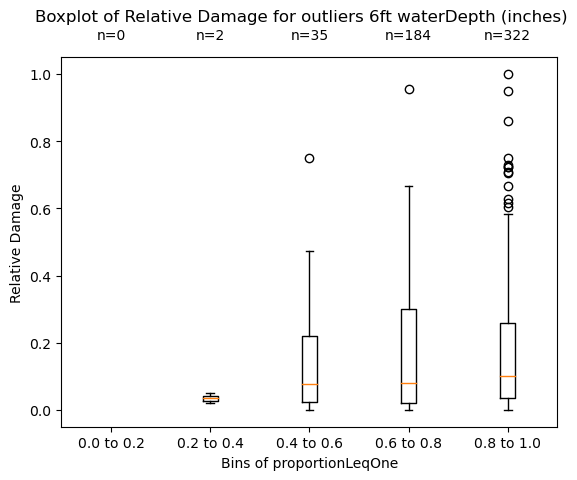

In [87]:
# Define the number of bins and the bin edges

# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

fig.suptitle('Boxplot of Relative Damage for outliers 6ft waterDepth (inches)')

# Show the plot
plt.show()

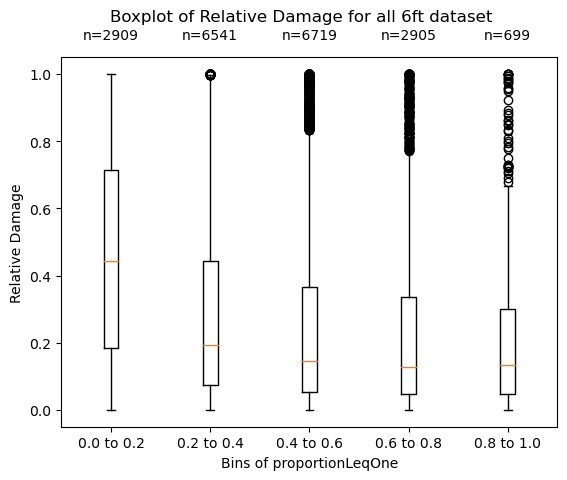

In [88]:
# Define the number of bins and the bin edges
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
df_copy_6ft['bins'] = pd.cut(df_copy_6ft['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = df_copy_6ft.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

fig.suptitle('Boxplot of Relative Damage for all 6ft dataset')


# Show the plot
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_1384\260368548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)


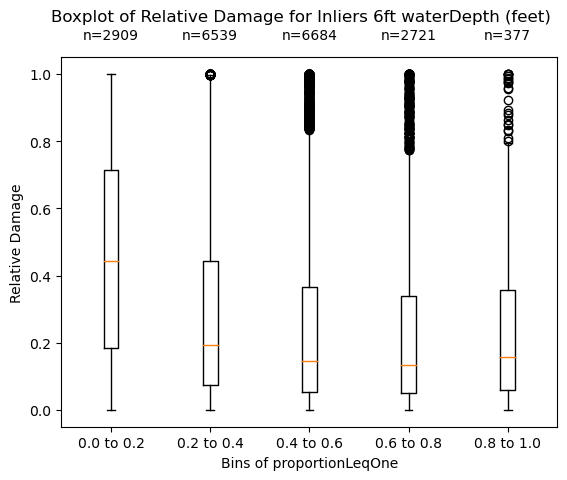

In [89]:
# Define the number of bins and the bin edges
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df_inliers.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

fig.suptitle('Boxplot of Relative Damage for Inliers 6ft waterDepth (feet)')

# Show the plot
plt.show()

### Inches

In [90]:
df_copy_1ft_encoded = df_copy[(df_copy['waterDepth'] == 1) | (df_copy['waterDepth'] == 0)].copy()
df_copy_1ft_encoded.drop(['waterDepth'], axis=1, inplace=True)

df_copy_1ft_encoded = df_copy_1ft_encoded.sample(n=10000, random_state=42)

df_copy_1ft_copy = df_copy_1ft_encoded.copy()

In [91]:
# Specify the variables to normalize
# variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne',  'medWaterDepth']
variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne']

# Normalize the variables
df_copy_1ft_copy[variables_to_normalize] = scaler.transform(df_copy_1ft_copy[variables_to_normalize])

In [92]:
y_train_pred = xgbod.predict(df_copy_1ft_copy)

In [93]:
(np.count_nonzero(y_train_pred == 1)/10000)*100

60.14000000000001

In [94]:
mask = y_train_pred == 1

mask_inliers = y_train_pred == 0

# Apply the mask to filter the DataFrame

filtered_df = df_copy_1ft_encoded[mask]

filtered_df_inliers = df_copy_1ft_encoded[mask_inliers]

C:\Users\Asus\AppData\Local\Temp\ipykernel_1384\1544721227.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)


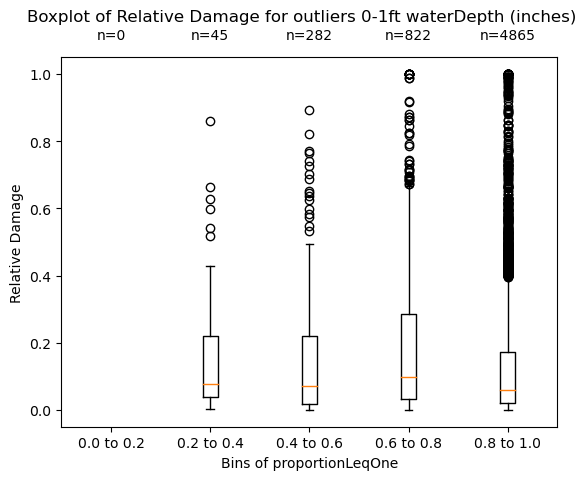

In [95]:
# Define the number of bins and the bin edges

# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

fig.suptitle('Boxplot of Relative Damage for outliers 0-1ft waterDepth (inches)')

# Show the plot
plt.show()

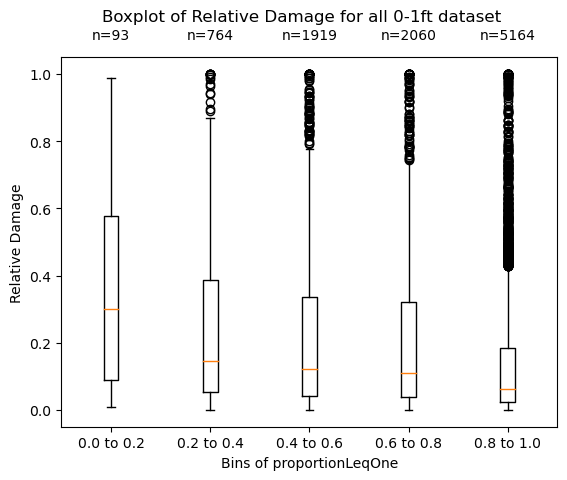

In [96]:
# Define the number of bins and the bin edges
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
df_copy_1ft_encoded['bins'] = pd.cut(df_copy_1ft_encoded['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = df_copy_1ft_encoded.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

fig.suptitle('Boxplot of Relative Damage for all 0-1ft dataset')


# Show the plot
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_1384\3350121931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)


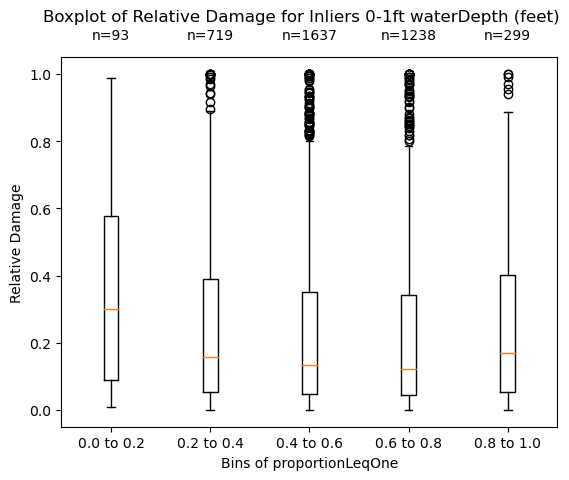

In [97]:
# Define the number of bins and the bin edges
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df_inliers.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

fig.suptitle('Boxplot of Relative Damage for Inliers 0-1ft waterDepth (feet)')

# Show the plot
plt.show()

### feet

In [98]:
df_copy_5ft_encoded = df_copy[(df_copy['waterDepth'] == 5) | (df_copy['waterDepth'] == 7)].copy()
df_copy_5ft_encoded.drop(['waterDepth'], axis=1, inplace=True)

df_copy_5ft_encoded = df_copy_5ft_encoded.sample(n=10000, random_state=42)

df_copy_5ft_copy = df_copy_5ft_encoded.copy()

In [99]:
# Specify the variables to normalize
# variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne',  'medWaterDepth']
variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne']

# Normalize the variables
df_copy_5ft_copy[variables_to_normalize] = scaler.transform(df_copy_5ft_copy[variables_to_normalize])

In [100]:
y_train_pred = xgbod.predict(df_copy_5ft_copy)

In [101]:
(np.count_nonzero(y_train_pred == 0)/10000)*100

98.77

In [102]:
mask = y_train_pred == 0

mask_inliers = y_train_pred == 1

# Apply the mask to filter the DataFrame

filtered_df = df_copy_5ft_encoded[mask]

filtered_df_inliers = df_copy_5ft_encoded[mask_inliers]

C:\Users\Asus\AppData\Local\Temp\ipykernel_1384\2488937354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)


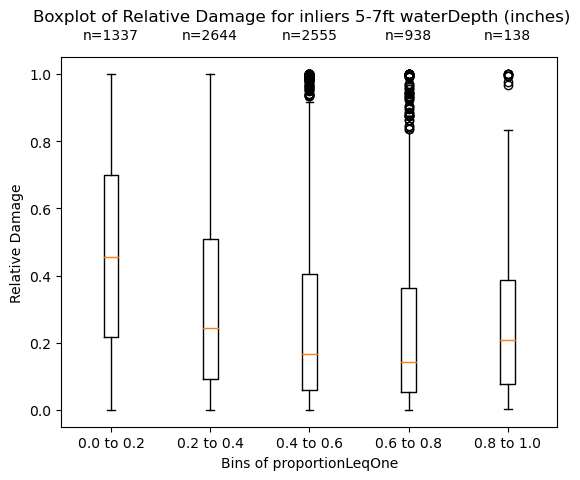

In [103]:
# Define the number of bins and the bin edges

# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

fig.suptitle('Boxplot of Relative Damage for inliers 5-7ft waterDepth (inches)')

# Show the plot
plt.show()

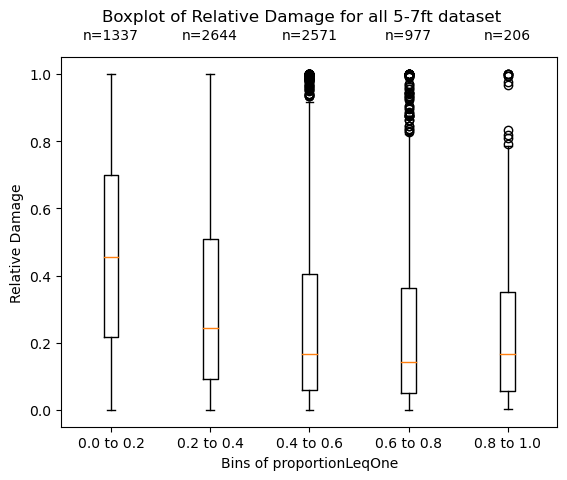

In [104]:
# Define the number of bins and the bin edges
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
df_copy_5ft_encoded['bins'] = pd.cut(df_copy_5ft_encoded['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = df_copy_5ft_encoded.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

fig.suptitle('Boxplot of Relative Damage for all 5-7ft dataset')


# Show the plot
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_1384\2633154839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)


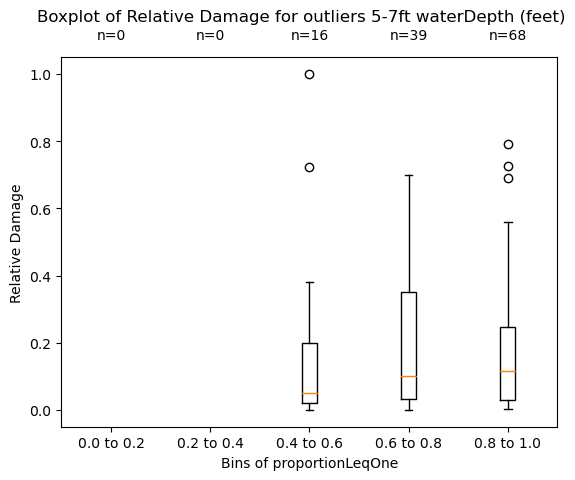

In [105]:
# Define the number of bins and the bin edges
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df_inliers.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

fig.suptitle('Boxplot of Relative Damage for outliers 5-7ft waterDepth (feet)')

# Show the plot
plt.show()

## Supervised Anomaly Detection using Deep Learning

### Autoencoder

In [ ]:
from pyod.models.auto_encoder import AutoEncoder

atcdr = AutoEncoder(contamination=0.1, hidden_neurons =[256, 128, 64, 32, 64, 128, 256])
atcdr.fit(df_6ft)

In [ ]:
y_train_scores = atcdr.decision_function(df_6ft)
y_train_pred = atcdr.predict(df_6ft)

In [ ]:

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , atcdr.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))

In [ ]:
plt.figure(figsize=(6, 4), dpi=80)
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

In [ ]:
threshold = atcdr.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df_6ft.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(df_6ft,y_train_scores, threshold)

In [ ]:
mask = y_train_pred == 1

mask_inliers = y_train_pred == 0

# Apply the mask to filter the DataFrame
filtered_df = df_copy_6ft[mask]

filtered_df_inliers = df_copy_6ft[mask_inliers]

In [ ]:
filtered_df['relativeDamage'].mean()

In [ ]:
filtered_df['proportionLeqOne'].median()

In [ ]:
filtered_df_inliers['relativeDamage'].mean()

In [ ]:
df_copy_6ft['relativeDamage'].mean()

In [ ]:
df_copy_6ft['proportionLeqOne'].mean()

In [ ]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

In [ ]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df_inliers['bins'] = pd.cut(filtered_df_inliers['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df_inliers.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

In [ ]:
df_copy_1ft_encoded = df_encoded[(df_encoded['waterDepth'] == 1) | (df_encoded['waterDepth'] == 0)].copy()
df_copy_1ft_encoded.drop(['waterDepth'], axis=1, inplace=True)


df_copy_1ft_encoded = df_copy_1ft_encoded.sample(n=10000, random_state=42)

df_copy_1ft_copy = df_copy_1ft_encoded.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Specify the variables to normalize
variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne',  'medWaterDepth']

# Normalize the variables
df_copy_1ft_copy[variables_to_normalize] = scaler.transform(df_copy_1ft_copy[variables_to_normalize])

In [ ]:
y_train_pred = atcdr.predict(df_copy_1ft_copy)

In [ ]:
np.count_nonzero(y_train_pred == 1)/10000

In [ ]:
len(y_train_pred)

In [ ]:
mask = y_train_pred == 1

mask_inliers = y_train_pred == 0

# Apply the mask to filter the DataFrame
filtered_df = df_copy_1ft_encoded[mask]

filtered_df_inliers = df_copy_1ft_encoded[mask_inliers]

In [ ]:
filtered_df.shape[0]

In [ ]:
filtered_df_inliers.shape[0]

In [ ]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
filtered_df['bins'] = pd.cut(filtered_df['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = filtered_df.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

In [ ]:
# Define the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Cut the data into bins
df_copy_1ft_encoded['bins'] = pd.cut(df_copy_1ft_encoded['proportionLeqOne'], bins=bin_edges)

# Group the data by the bins
grouped_data = df_copy_1ft_encoded.groupby('bins')

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()

In [ ]:
atcdr1 = AutoEncoder(contamination=0.05, hidden_neurons =[2, 2])
atcdr2 = AutoEncoder(contamination=0.05, hidden_neurons =[10, 2, 10])
atcdr3 = AutoEncoder(contamination=0.05, hidden_neurons =[15, 10, 2, 10, 15] )

In [ ]:
atcdr1.fit(df_6ft)
atcdr2.fit(df_6ft)
atcdr3.fit(df_6ft)

In [ ]:
# Store the results in each column:
train_scores[:, 0] = atcdr1.decision_function(df_6ft) 
train_scores[:, 1] = atcdr2.decision_function(df_6ft) 
train_scores[:, 2] = atcdr3.decision_function(df_6ft)
test_scores[:, 0] = atcdr1.decision_function(df_6ft) 
test_scores[:, 1] = atcdr2.decision_function(df_6ft) 
test_scores[:, 2] = atcdr3.decision_function(df_6ft)

In [ ]:
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

# Combination by average
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)

In [ ]:
plt.figure(figsize=(6, 4), dpi=80)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [ ]:
descriptive_stat_threshold(X_train,y_train_by_average, 0.0)